In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import datetime  

In [2]:
start = '2012-01-01'
end = datetime.datetime.now().strftime('%Y-%m-%d')
stock = 'AAPL'
# Get the data
data = yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416986,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754257,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734027,394024400
...,...,...,...,...,...,...,...
3114,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
3115,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
3116,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
3117,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


In [4]:
ma_100_days = data['Close'].rolling(100).mean()


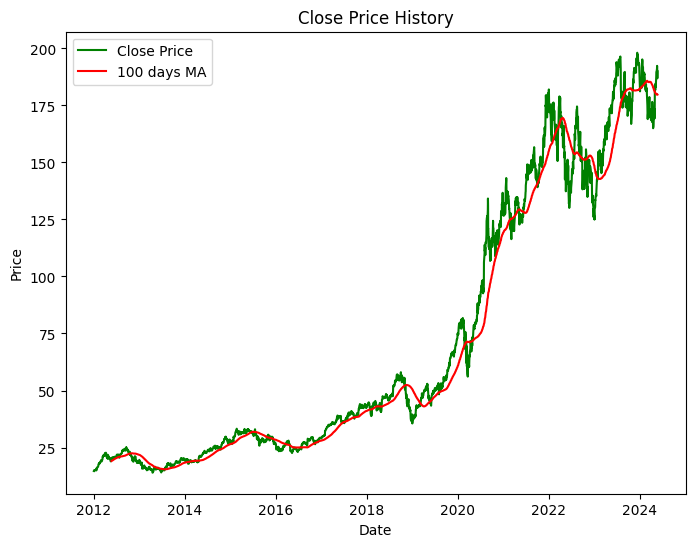

In [5]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_100_days, label='100 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [6]:
ma_200_days = data['Close'].rolling(200).mean()

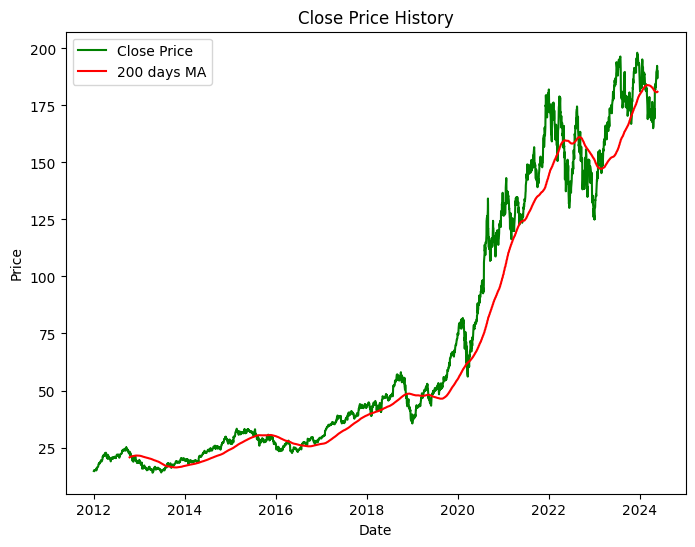

In [7]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_200_days, label='200 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [8]:
data.dropna(inplace=True)

## Training...  ##

In [9]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)]) 

In [10]:
data_train.shape[0], data_test.shape[0]

(2495, 624)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x_train = []
y_train = []
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, LSTM, Dropout
from keras import backend


In [16]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\jestebangil\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - loss: 0.0482
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0055
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0049
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - loss: 0.0040
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - loss: 0.0040
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - loss: 0.0035
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - loss: 0.0029
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0038
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - loss: 0.0029
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - loss: 0.0027
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - loss: 0.0030
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - loss: 0.0027
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 0.0022
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0021
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [19]:
model.save('pages/stock_prediction.h5')

In [20]:
data_test.head()

,Close
2495,164.770004
2496,163.759995
2497,161.839996
2498,165.320007
2499,171.179993


In [21]:
past_100_days = data_train.tail(100)

In [22]:
final_df = past_100_days._append(data_test, ignore_index=True)
final_df.head()

,Close
0,144.500000
1,145.639999
2,149.149994
3,148.479996
4,146.389999


In [23]:
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(724, 1)

In [24]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [25]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(624, 100, 1) (624,)


## Making Predictions ##

In [26]:
y_predicted = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


In [27]:
y_predicted.shape

(624, 1)

In [28]:
y_test

array([5.43850123e-01, 5.30031410e-01, 5.03762453e-01, 5.51375133e-01,
       6.31550055e-01, 6.84909050e-01, 6.77794476e-01, 7.44698281e-01,
       6.93939063e-01, 6.74647729e-01, 7.42646100e-01, 6.46326383e-01,
       6.31002876e-01, 6.11985236e-01, 6.56314219e-01, 6.92570803e-01,
       7.01327122e-01, 7.56738298e-01, 7.42509149e-01, 7.43740666e-01,
       7.27596079e-01, 7.18976711e-01, 7.79723557e-01, 7.48118721e-01,
       6.82719918e-01, 6.42769200e-01, 6.45095074e-01, 6.45368768e-01,
       6.84909050e-01, 6.91065801e-01, 6.45368768e-01, 6.57408785e-01,
       6.12669366e-01, 5.63825378e-01, 5.40292731e-01, 5.11561157e-01,
       5.00752449e-01, 4.75578058e-01, 4.74346749e-01, 4.67916305e-01,
       6.19920683e-01, 6.80804480e-01, 6.78478605e-01, 6.95307114e-01,
       6.55082702e-01, 6.48105078e-01, 6.38117451e-01, 6.81488610e-01,
       7.01327122e-01, 6.44410944e-01, 5.96798473e-01, 6.00082171e-01,
       6.53577699e-01, 6.50294210e-01, 6.00082171e-01, 5.78464963e-01,
      

In [29]:
y_predicted

array([[0.44850338],
       [0.46332633],
       [0.47765952],
       [0.4904505 ],
       [0.5017248 ],
       [0.51290095],
       [0.5255535 ],
       [0.5403853 ],
       [0.5578303 ],
       [0.57692194],
       [0.5959785 ],
       [0.6145062 ],
       [0.63061154],
       [0.6428805 ],
       [0.6505744 ],
       [0.65449476],
       [0.6562873 ],
       [0.65743744],
       [0.6595143 ],
       [0.66325605],
       [0.66874427],
       [0.6754366 ],
       [0.682513  ],
       [0.6899943 ],
       [0.69753104],
       [0.70374185],
       [0.70721877],
       [0.707451  ],
       [0.70459884],
       [0.6997822 ],
       [0.6943114 ],
       [0.68864864],
       [0.68316424],
       [0.6775679 ],
       [0.67100143],
       [0.66272455],
       [0.6522937 ],
       [0.6397362 ],
       [0.6253069 ],
       [0.6094932 ],
       [0.59286815],
       [0.57724077],
       [0.56508625],
       [0.5582994 ],
       [0.5578894 ],
       [0.563419  ],
       [0.57335395],
       [0.585

In [30]:
scaler.scale_

array([0.01368176])

In [31]:
scale_factor = 1/8.18605127e-04
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

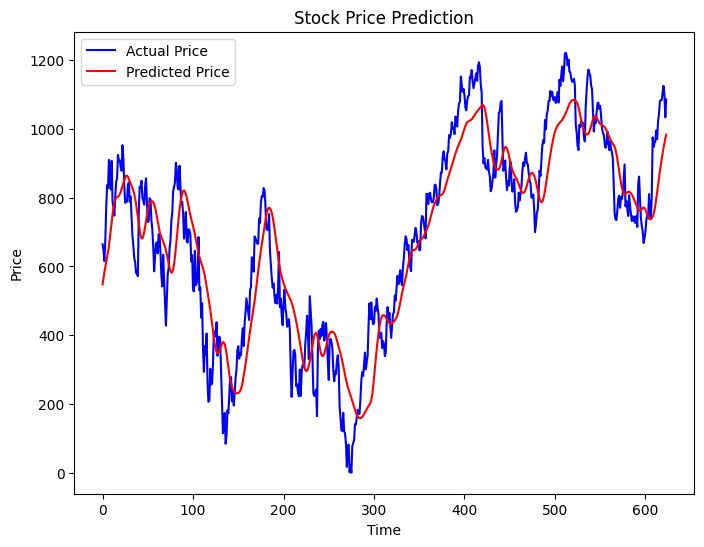

In [32]:
plt.figure(figsize=(8,6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_predicted, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')